In [1]:
import sys, os

hostname = os.uname()[1]

if "crc" in hostname:
    scriptdir = "/cr/users/filip/bin/"
elif "beep-boop" == hostname:
    scriptdir = "/home/quizznor/projects/phd-thesis/bin/"

sys.path.append(scriptdir)

from utils.binaries import *
from utils.plotting import *

06:48:01 [INFO] utils          -- ( +1775ms) -- import logging
06:48:01 [INFO] utils.binaries -- (  +382ms) -- import numpy as np
06:48:02 [INFO] utils.binaries -- ( +1026ms) -- import pandas as pd
06:48:02 [INFO] utils.binaries -- (   +83ms) -- import binaries.tools as tool
06:48:03 [INFO] utils.plotting -- ( +1232ms) -- import matplotlib.pyplot as plt
06:48:05 [INFO] utils.plotting -- ( +1433ms) -- import seaborn as so
06:48:05 [DBUG] utils.plotting -- (   +68ms) -- font size set to 8
06:48:05 [DBUG] utils.plotting -- (   +11ms) -- figure size set to [6.6, 3.3]
06:48:05 [DBUG] utils.plotting -- (   +23ms) -- markersize set to 2.0
06:48:05 [DBUG] utils.plotting -- (   +13ms) -- usetex set to False
06:48:05 [INFO] utils.plotting -- (   +46ms) -- import plotting.tools as plot


In [11]:
nm, photons = np.loadtxt("moon.csv", delimiter=',', unpack=True)
sort = np.argsort(nm)

h = 6.626e-34                               # Js
c = 3e8                                     # m/s
irradiance = photons * h * c / (nm * 1e-9)
irradiance *= 1e5                           # to convert from cm2 to m2

irradiance = irradiance[sort]
nm = nm[sort]

1.625024876529603e-08


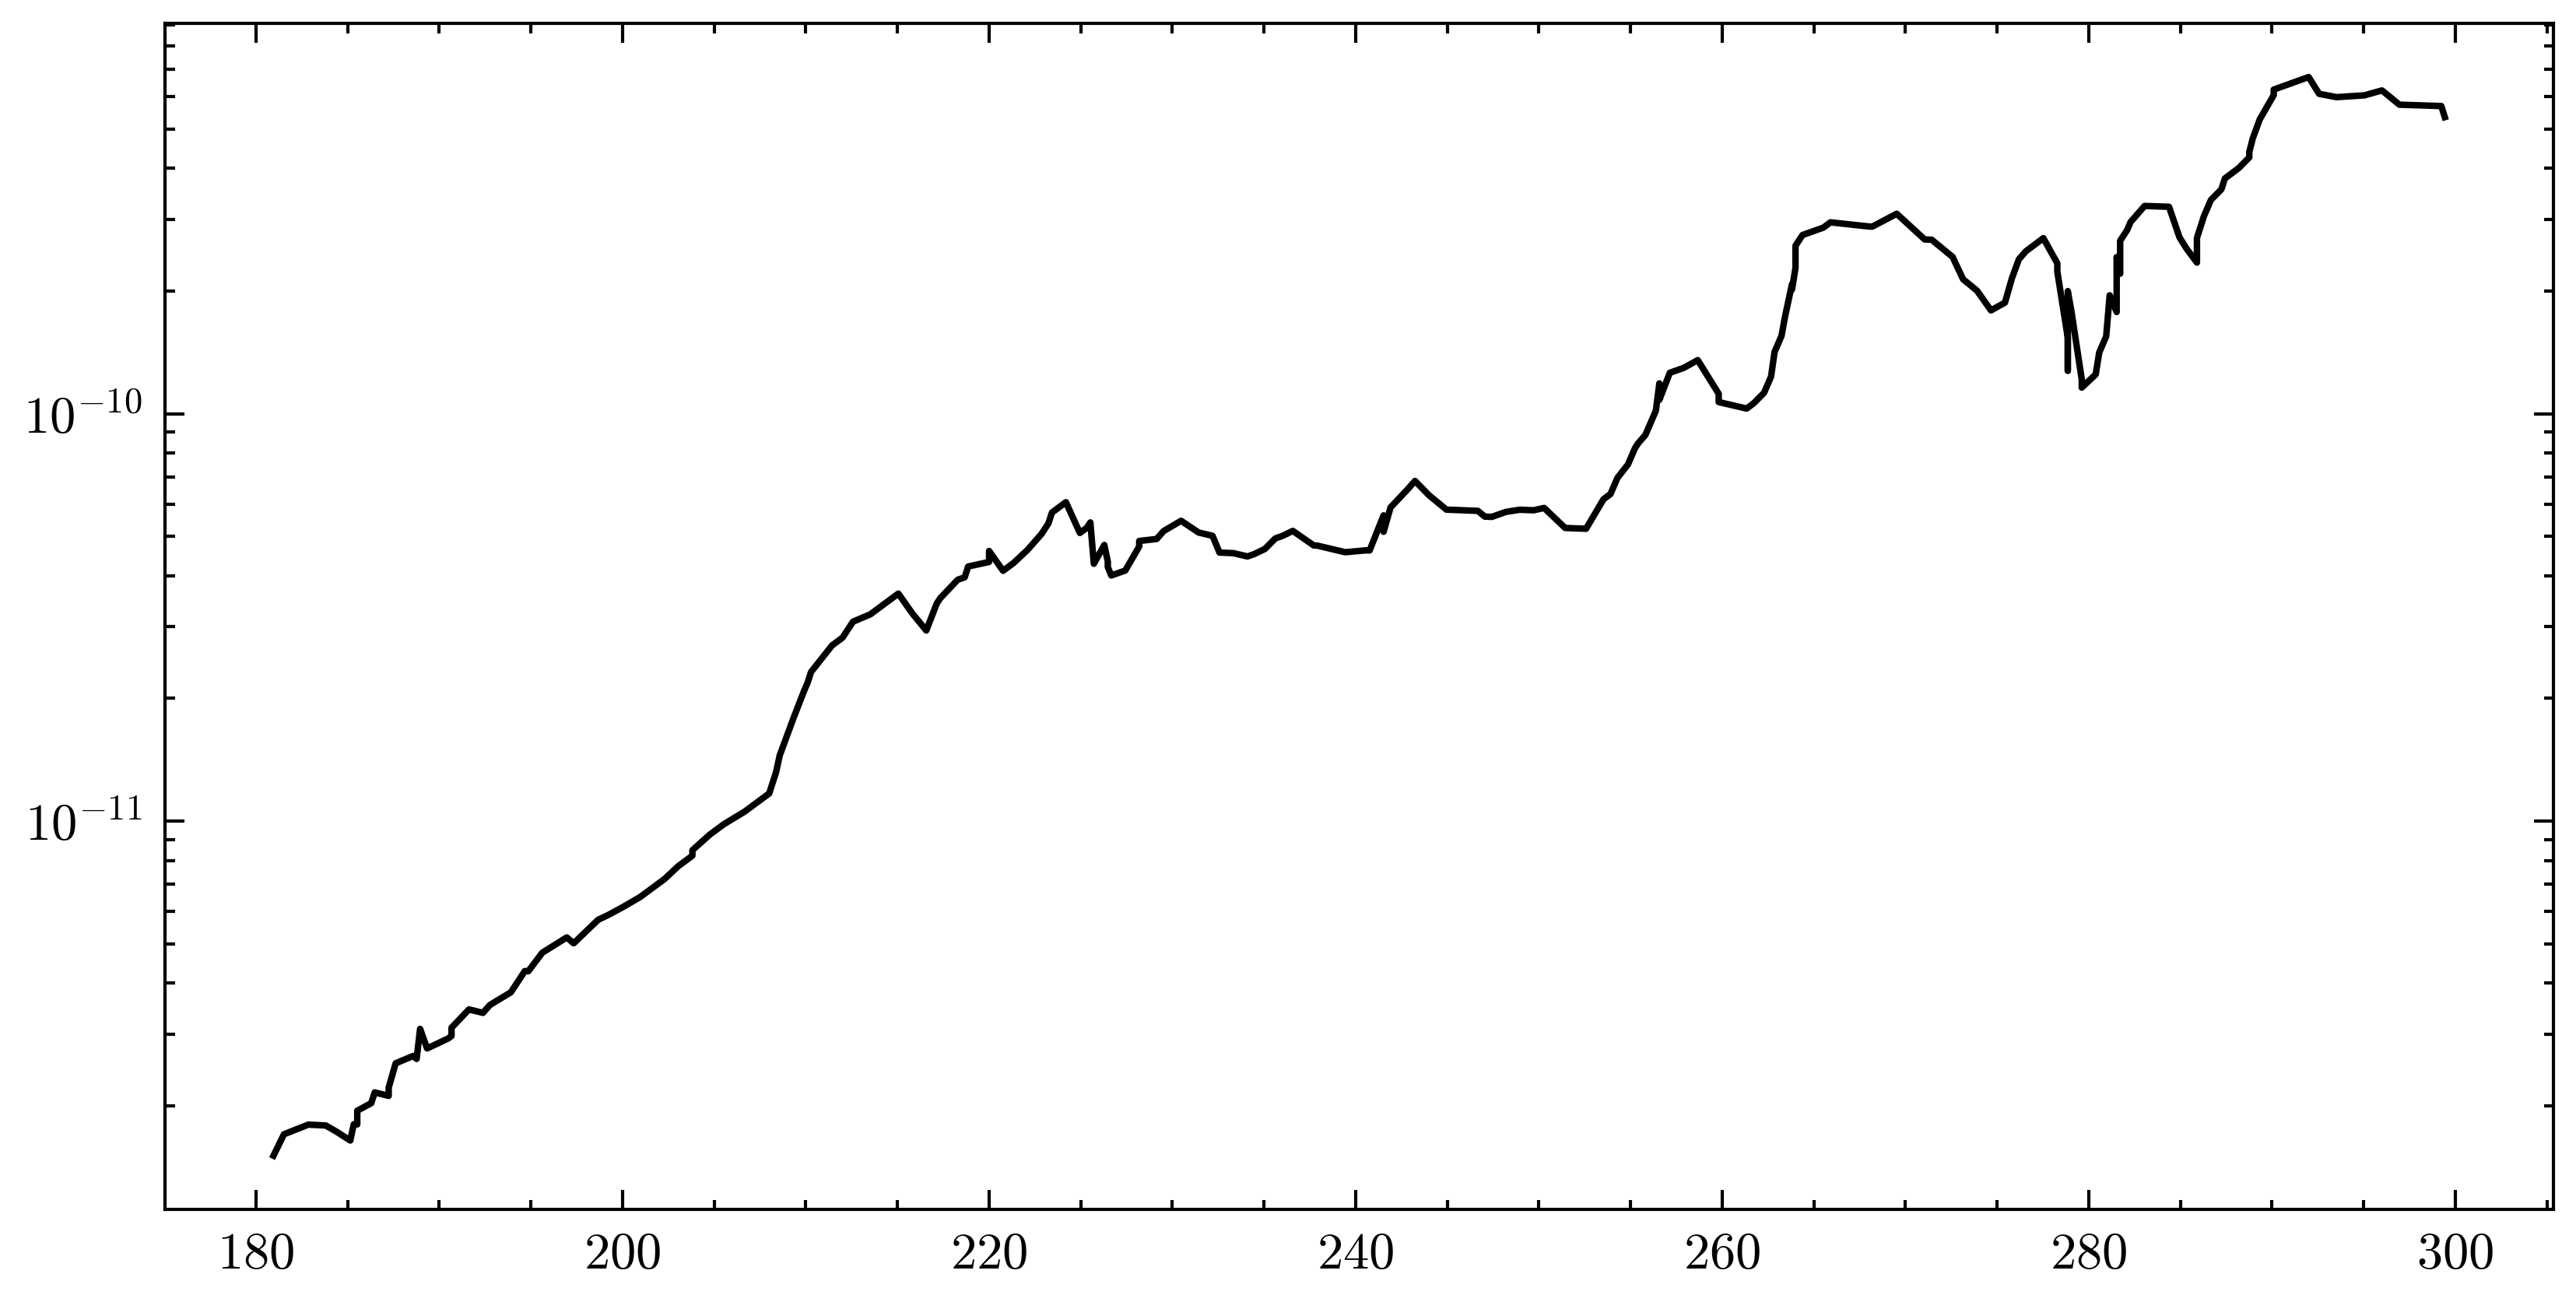

In [14]:
plt.plot(nm, irradiance)
plt.yscale('log')

int_irradiance = 0

for dx, y in zip(np.diff(nm), irradiance):
    int_irradiance += y * dx

print(int_irradiance)